### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Valor Final
tienda['Valor Final'] = tienda['Precio'] * tienda['Cantidad de cuotas']
tienda2['Valor Final'] = tienda2['Precio'] * tienda2['Cantidad de cuotas']
tienda3['Valor Final'] = tienda3['Precio'] * tienda3['Cantidad de cuotas']
tienda4['Valor Final'] = tienda4['Precio'] * tienda4['Cantidad de cuotas']

#Calcula la facturación total de cada tienda
facturacion_tienda1 = tienda['Valor Final'].sum()
facturacion_tienda2 = tienda2['Valor Final'].sum()
facturacion_tienda3 = tienda3['Valor Final'].sum()
facturacion_tienda4 = tienda4['Valor Final'].sum()

print(f"Facturación de Tienda 1: ${facturacion_tienda1:.2f}")
print(f"Facturación de Tienda 2: ${facturacion_tienda2:.2f}")
print(f"Facturación de Tienda 3: ${facturacion_tienda3:.2f}")
print(f"Facturación de Tienda 4: ${facturacion_tienda4:.2f}")


Facturación de Tienda 1: $3422717700.00
Facturación de Tienda 2: $3337189200.00
Facturación de Tienda 3: $3243816900.00
Facturación de Tienda 4: $3098827200.00


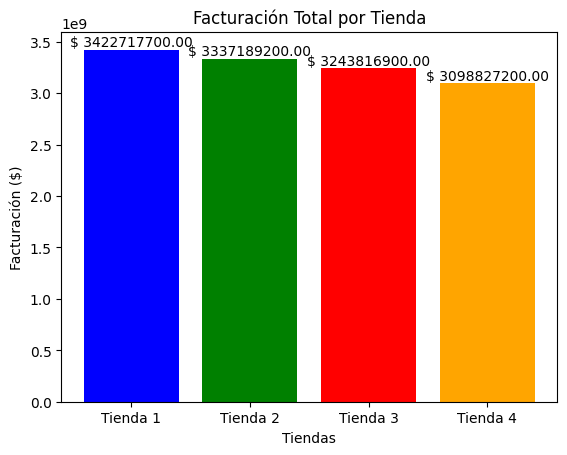

In [3]:
import matplotlib.pyplot as plt

# Datos para el gráfico
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Creando el gráfico de barras
plt.bar(tiendas, facturaciones, color=['blue', 'green', 'red', 'orange'])  # Personalizando los colores de las barras

plt.title('Facturación Total por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación ($)')

# Añadiendo los valores de facturación encima de cada barra
for i, v in enumerate(facturaciones):
    plt.text(i, v, f'$ {v:.2f}', ha='center', va='bottom')

plt.show()


# 2. Ventas por categoría

In [4]:
# Agrupa las ventas por categoría y suma la cantidad vendida para cada tienda
ventas_por_categoria_tienda1 = tienda.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Cantidad de cuotas'].sum()

# Muestra los resultados para cada tienda
print("Tienda 1:\n", ventas_por_categoria_tienda1)
print("\nTienda 2:\n", ventas_por_categoria_tienda2)
print("\nTienda 3:\n", ventas_por_categoria_tienda3)
print("\nTienda 4:\n", ventas_por_categoria_tienda4)

Tienda 1:
 Categoría del Producto
Artículos para el hogar     489
Deportes y diversión        796
Electrodomésticos           906
Electrónicos               1341
Instrumentos musicales      573
Juguetes                    872
Libros                      520
Muebles                    1446
Name: Cantidad de cuotas, dtype: int64

Tienda 2:
 Categoría del Producto
Artículos para el hogar     493
Deportes y diversión        720
Electrodomésticos           890
Electrónicos               1333
Instrumentos musicales      659
Juguetes                    876
Libros                      611
Muebles                    1265
Name: Cantidad de cuotas, dtype: int64

Tienda 3:
 Categoría del Producto
Artículos para el hogar     542
Deportes y diversión        873
Electrodomésticos           882
Electrónicos               1262
Instrumentos musicales      580
Juguetes                    937
Libros                      517
Muebles                    1408
Name: Cantidad de cuotas, dtype: int64

Tienda 4:


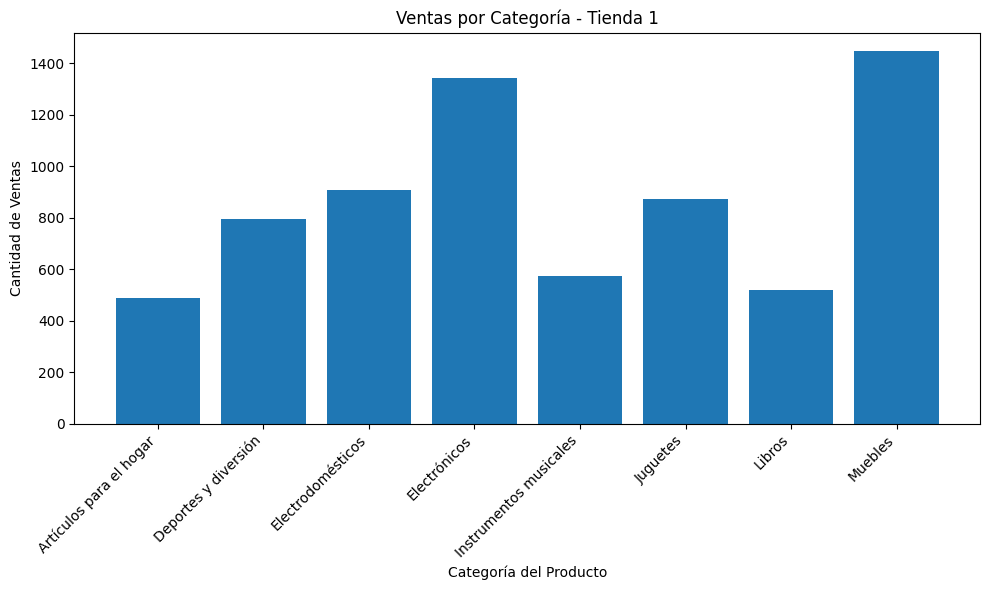

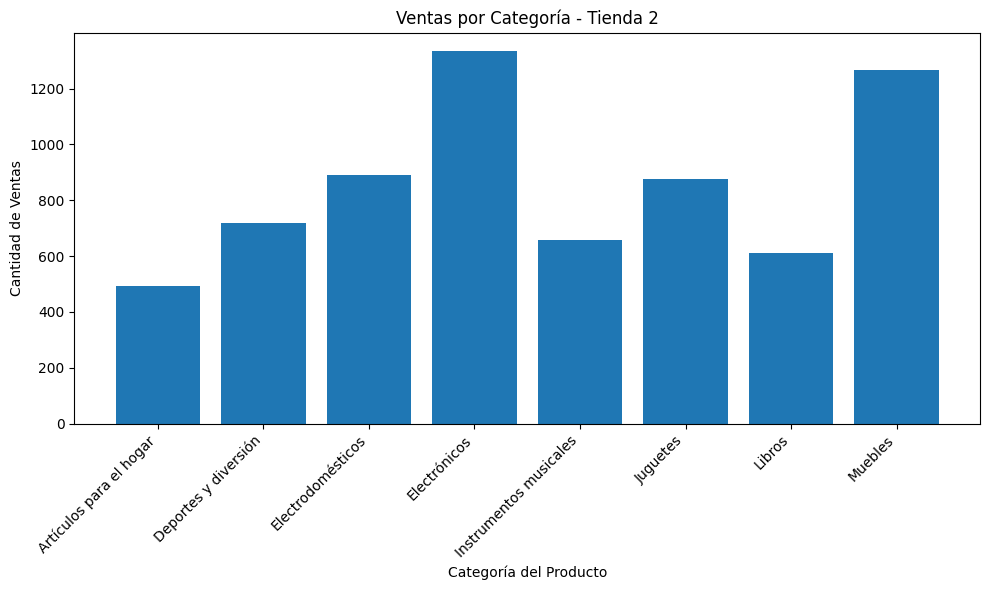

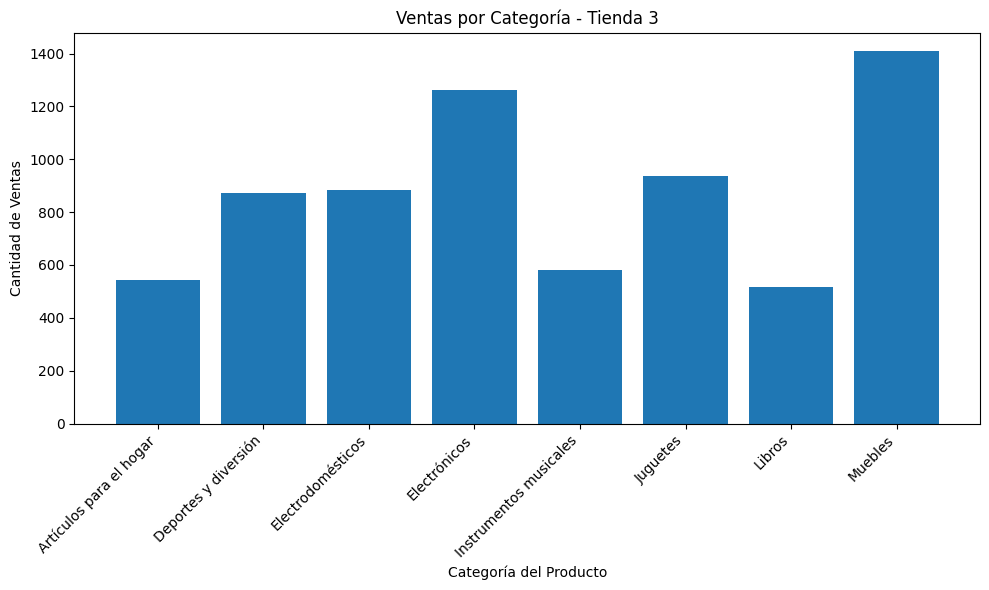

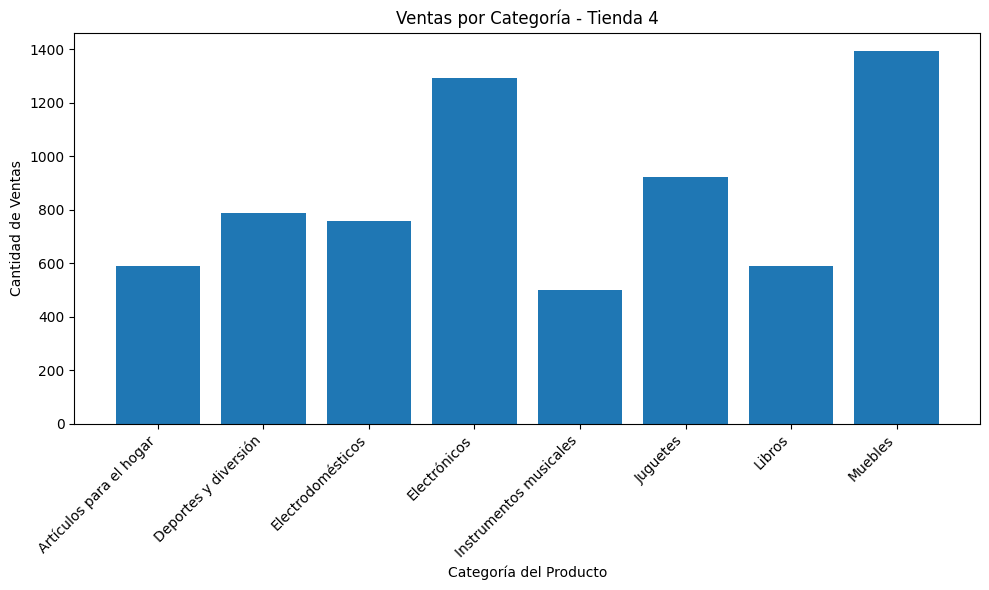

In [5]:
# Función para crear un gráfico de barras para una tienda
def crear_grafico_ventas_categoria(nombre_tienda, ventas_por_categoria):
    plt.figure(figsize=(10, 6))  # Define el tamaño de la figura
    plt.bar(ventas_por_categoria.index, ventas_por_categoria.values)
    plt.title(f'Ventas por Categoría - {nombre_tienda}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor visualización
    plt.tight_layout()  # Ajusta el diseño para evitar superposición de elementos
    plt.show()

# Crea gráficos para cada tienda
crear_grafico_ventas_categoria('Tienda 1', ventas_por_categoria_tienda1)
crear_grafico_ventas_categoria('Tienda 2', ventas_por_categoria_tienda2)
crear_grafico_ventas_categoria('Tienda 3', ventas_por_categoria_tienda3)
crear_grafico_ventas_categoria('Tienda 4', ventas_por_categoria_tienda4)


# 3. Calificación promedio de la tienda


In [6]:
promedio_evaluacion_tienda1 = tienda['Calificación'].mean()
promedio_evaluacion_tienda2 = tienda2['Calificación'].mean()
promedio_evaluacion_tienda3 = tienda3['Calificación'].mean()
promedio_evaluacion_tienda4 = tienda4['Calificación'].mean()

print(f"Promedio de Evaluación Tienda 1: {promedio_evaluacion_tienda1:.2f}")
print(f"Promedio de Evaluación Tienda 2: {promedio_evaluacion_tienda2:.2f}")
print(f"Promedio de Evaluación Tienda 3: {promedio_evaluacion_tienda3:.2f}")
print(f"Promedio de Evaluación Tienda 4: {promedio_evaluacion_tienda4:.2f}")

Promedio de Evaluación Tienda 1: 3.98
Promedio de Evaluación Tienda 2: 4.04
Promedio de Evaluación Tienda 3: 4.05
Promedio de Evaluación Tienda 4: 4.00


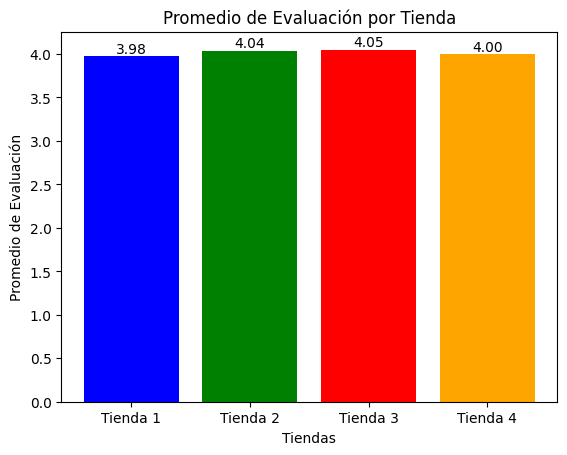

In [7]:
# Crea un gráfico de barras para comparar los promedios de evaluación de las tiendas
import matplotlib.pyplot as plt

promedios_evaluacion = [promedio_evaluacion_tienda1, promedio_evaluacion_tienda2,
                        promedio_evaluacion_tienda3, promedio_evaluacion_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.bar(tiendas, promedios_evaluacion, color=['blue', 'green', 'red', 'orange'])
plt.title('Promedio de Evaluación por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Promedio de Evaluación')

# Añade los valores de los promedios encima de cada barra
for i, v in enumerate(promedios_evaluacion):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Agrupa las ventas por producto y suma la cantidad vendida para cada tienda
ventas_por_producto_tienda1 = tienda.groupby('Producto')['Cantidad de cuotas'].sum()
ventas_por_producto_tienda2 = tienda2.groupby('Producto')['Cantidad de cuotas'].sum()
ventas_por_producto_tienda3 = tienda3.groupby('Producto')['Cantidad de cuotas'].sum()
ventas_por_producto_tienda4 = tienda4.groupby('Producto')['Cantidad de cuotas'].sum()

# Encuentra los productos más y menos vendidos en cada tienda
mas_vendido_tienda1 = ventas_por_producto_tienda1.idxmax()
menos_vendido_tienda1 = ventas_por_producto_tienda1.idxmin()

mas_vendido_tienda2 = ventas_por_producto_tienda2.idxmax()
menos_vendido_tienda2 = ventas_por_producto_tienda2.idxmin()

mas_vendido_tienda3 = ventas_por_producto_tienda3.idxmax()
menos_vendido_tienda3 = ventas_por_producto_tienda3.idxmin()

mas_vendido_tienda4 = ventas_por_producto_tienda4.idxmax()
menos_vendido_tienda4 = ventas_por_producto_tienda4.idxmin()

# Muestra los resultados
print(f"Tienda 1: Más vendido - {mas_vendido_tienda1}, Menos vendido - {menos_vendido_tienda1}")
print(f"Tienda 2: Más vendido - {mas_vendido_tienda2}, Menos vendido - {menos_vendido_tienda2}")
print(f"Tienda 3: Más vendido - {mas_vendido_tienda3}, Menos vendido - {menos_vendido_tienda3}")
print(f"Tienda 4: Más vendido - {mas_vendido_tienda4}, Menos vendido - {menos_vendido_tienda4}")


Tienda 1: Más vendido - Secadora de ropa, Menos vendido - Celular ABXY
Tienda 2: Más vendido - Iniciando en programación, Menos vendido - Mesa de comedor
Tienda 3: Más vendido - Bicicleta, Menos vendido - TV LED UHD 4K
Tienda 4: Más vendido - Dashboards con Power BI, Menos vendido - Armario


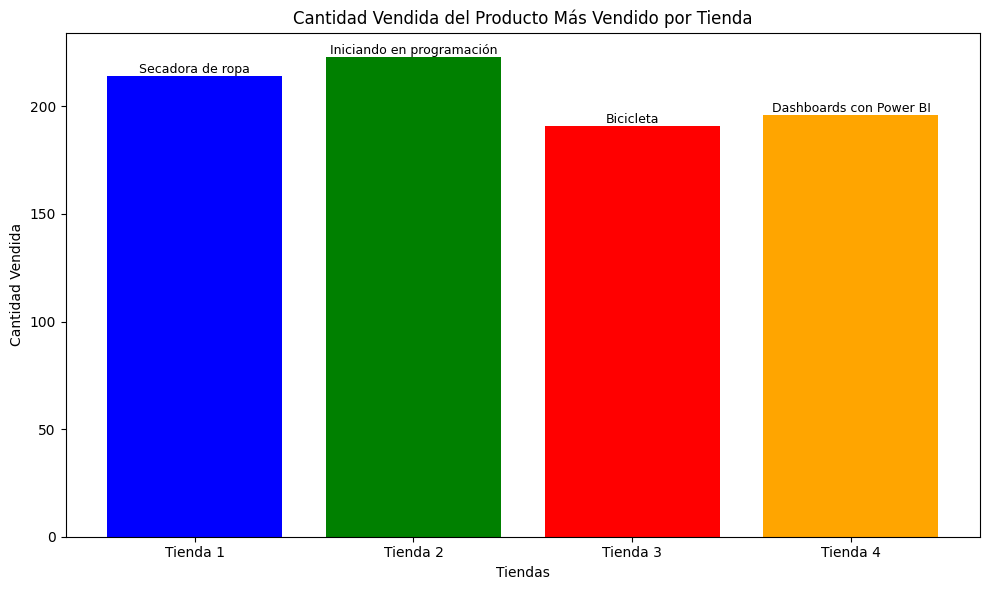

In [ ]:
# Obtener las cantidades vendidas de los productos más vendidos
cantidades_mas_vendidas = [
    ventas_por_producto_tienda1[mas_vendido_tienda1],
    ventas_por_producto_tienda2[mas_vendido_tienda2],
    ventas_por_producto_tienda3[mas_vendido_tienda3],
    ventas_por_producto_tienda4[mas_vendido_tienda4]
]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(tiendas, cantidades_mas_vendidas, color=['blue', 'green', 'red', 'orange'])
plt.title('Cantidad Vendida del Producto Más Vendido por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Cantidad Vendida')

# Agregar etiquetas con el nombre del producto encima de cada barra
for i, (producto, cantidad) in enumerate(zip(productos_mas_vendidos, cantidades_mas_vendidas)):
    plt.text(i, cantidad, producto, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

In [8]:
# Assuming pandas is imported and urls are defined.
# Reloading `tienda` to ensure it's a DataFrame, as it was overwritten by a string.
tienda = pd.read_csv(url)

# Calcula el flete promedio de cada tienda
flete_promedio_tienda1 = tienda['Costo de envío'].mean()
flete_promedio_tienda2 = tienda2['Costo de envío'].mean()
flete_promedio_tienda3 = tienda3['Costo de envío'].mean()
flete_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Muestra los resultados
print(f"Flete Promedio Tienda 1: ${flete_promedio_tienda1:.2f}")
print(f"Flete Promedio Tienda 2: ${flete_promedio_tienda2:.2f}")
print(f"Flete Promedio Tienda 3: ${flete_promedio_tienda3:.2f}")
print(f"Flete Promedio Tienda 4: ${flete_promedio_tienda4:.2f}")

Flete Promedio Tienda 1: $26018.61
Flete Promedio Tienda 2: $25216.24
Flete Promedio Tienda 3: $24805.68
Flete Promedio Tienda 4: $23459.46


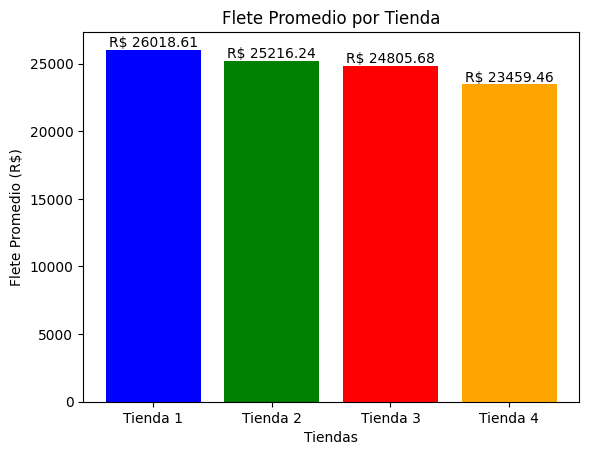

In [9]:
# Crea un gráfico de barras para comparar los fletes promedio de las tiendas (opcional)
import matplotlib.pyplot as plt

fletes_promedio = [flete_promedio_tienda1, flete_promedio_tienda2, flete_promedio_tienda3, flete_promedio_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.bar(tiendas, fletes_promedio, color=['blue', 'green', 'red', 'orange'])
plt.title('Flete Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Flete Promedio (R$)')

# Agrega los valores de los fletes promedio encima de cada barra
for i, v in enumerate(fletes_promedio):
    plt.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

plt.show()
